# MUSA 650 Homework 1: Basics of Machine Learning
```

In [1]:
## 1. Data Exploration

import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
x_train,_,y_train,_=train_test_split(x_train,y_train,test_size=0.8,random_state=20)
x_test,_,y_test,_=train_test_split(x_test, y_test,test_size=0.8,random_state=20)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(12000, 28, 28) (12000,) (2000, 28, 28) (2000,)



### 1.1 Dimensionality

What is the type of the training and testing datasets?

How many features are in the training dataset? The testing dataset? How many samples are in each dataset?

If an array has a shape of (100, 28, 28), what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?

How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how flatten() and reshape() can be used for this purpose.

Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)


### 1.2 Visualization

Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.

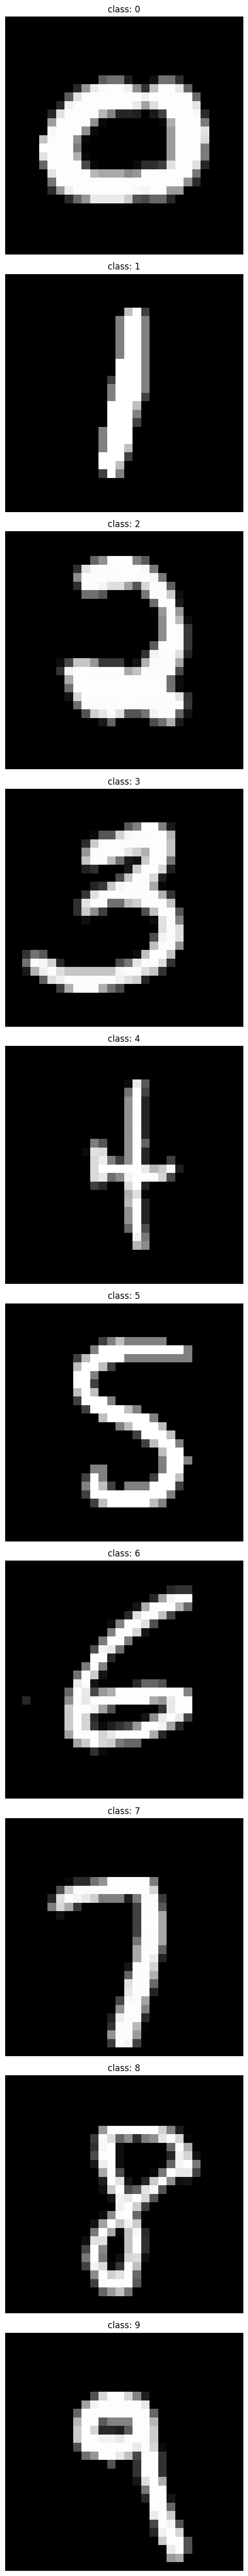

In [3]:
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)
num_classes = len(classes)

plt.figure(figsize=(10, 5*num_classes))

for i, class_id in enumerate(classes):

    idx = np.where(y_test == class_id)[0][0]
    
    plt.subplot(num_classes, 1, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'class: {class_id}')  
    plt.axis('off')  

plt.tight_layout()
plt.show()


## 2. Data Processing

### 2.1 Subsetting

Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

Now subset the first 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?

Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_test_subset, _, y_test_subset, _ = train_test_split(x_test, y_test, test_size=0.1, random_state=42)

print("                               ",[0,1,2,3,4,5,6,7,8,9])

initial_train_label_distribution = np.bincount(y_train)
print("Label distribution in the initial training dataset：", initial_train_label_distribution)


subset_train_label_distribution = np.bincount(y_train_subset)
print("Label distribution in the randomly reduced training dataset：", subset_train_label_distribution)

initial_train_subset_label_distribution = np.bincount(y_train_subset)
print("Label distribution in the first 10% subset of the training dataset：", initial_train_subset_label_distribution)


                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Label distribution in the initial training dataset： [1214 1359 1201 1224 1179 1128 1164 1218 1138 1175]
Label distribution in the randomly reduced training dataset： [1094 1231 1083 1097 1060 1021 1040 1084 1027 1063]
Label distribution in the first 10% subset of the training dataset： [1094 1231 1083 1097 1060 1021 1040 1084 1027 1063]


### 2.2 Feature Engineering

What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?

Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.
Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.

Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.

In plain English, what are we actually doing when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?

What is the index of the most dissimilar image in category "3" in the training set for the regular images? What about the most similar image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.

What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?
How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?

Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?

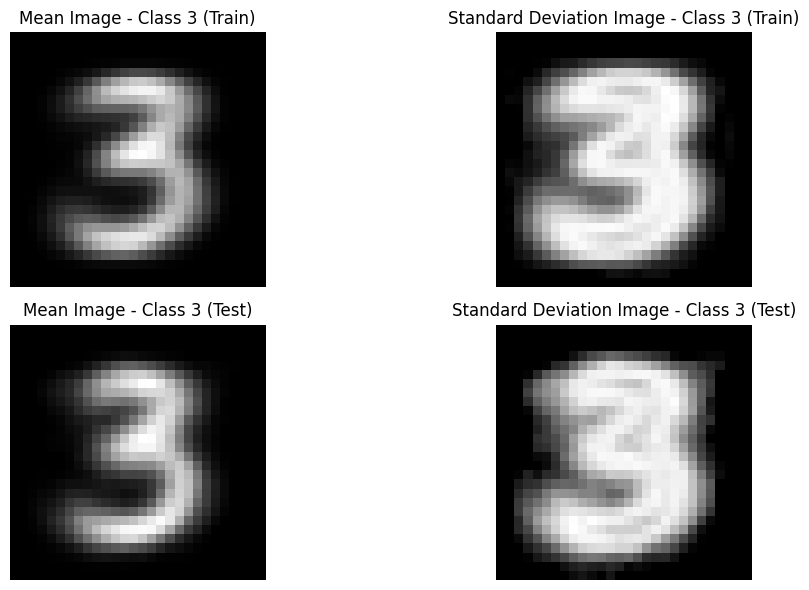

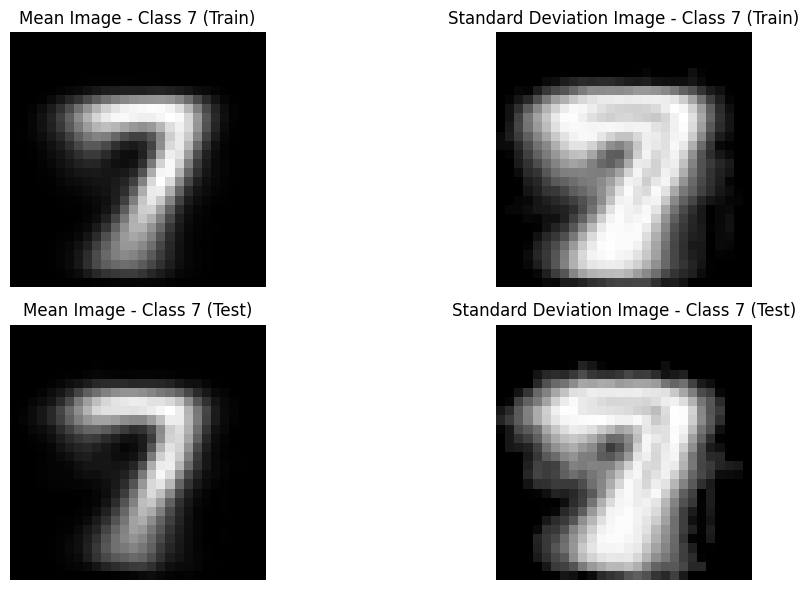

In [5]:
import numpy as np
import matplotlib.pyplot as plt

threes_indices = np.where(y_train == 3)[0]
threes_images = x_train[threes_indices]

mean_image = np.mean(threes_images, axis=0)

mean_image_train = np.mean(x_train[y_train == 3], axis=0)
std_image_train = np.std(x_train[y_train == 3], axis=0)

mean_image_test = np.mean(x_test[y_test == 3], axis=0)
std_image_test = np.std(x_test[y_test == 3], axis=0)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(mean_image_train, cmap='gray')
plt.title("Mean Image - Class 3 (Train)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(std_image_train, cmap='gray')
plt.title("Standard Deviation Image - Class 3 (Train)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mean_image_test, cmap='gray')
plt.title("Mean Image - Class 3 (Test)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(std_image_test, cmap='gray')
plt.title("Standard Deviation Image - Class 3 (Test)")
plt.axis('off')

plt.tight_layout()
plt.show()



import numpy as np
import matplotlib.pyplot as plt

sevens_indices = np.where(y_train == 7)[0]
sevens_images = x_train[sevens_indices]

mean_image = np.mean(sevens_images, axis=0)

mean_image_train = np.mean(x_train[y_train == 7], axis=0)
std_image_train = np.std(x_train[y_train == 7], axis=0)

mean_image_test = np.mean(x_test[y_test == 7], axis=0)
std_image_test = np.std(x_test[y_test == 7], axis=0)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(mean_image_train, cmap='gray')
plt.title("Mean Image - Class 7 (Train)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(std_image_train, cmap='gray')
plt.title("Standard Deviation Image - Class 7 (Train)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mean_image_test, cmap='gray')
plt.title("Mean Image - Class 7 (Test)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(std_image_test, cmap='gray')
plt.title("Standard Deviation Image - Class 7 (Test)")
plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Model Training, Validation, and Intepretation

### 3.1 Support Vector Machine

From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

selected_indices = np.where((y_train == 3) | (y_train == 9))[0]
selected_images = x_train[selected_indices]
selected_labels = np.where(y_train[selected_indices] == 3, 0, 1)


split_idx = int(0.6 * len(selected_images))
Set1_images, Set2_images = selected_images[:split_idx], selected_images[split_idx:]
Set1_labels, Set2_labels = selected_labels[:split_idx], selected_labels[split_idx:]


Set1_images_flat = Set1_images.reshape(len(Set1_images), -1)
Set2_images_flat = Set2_images.reshape(len(Set2_images), -1)

svm_train_on_Set1 = SVC(kernel='linear')
svm_train_on_Set1.fit(Set1_images_flat, Set1_labels)
predictions_Set2 = svm_train_on_Set1.predict(Set2_images_flat)
accuracy_Set1_trained = accuracy_score(Set2_labels, predictions_Set2)
print(f"Accuracy of model trained on Set1 (training set): {accuracy_Set1_trained * 100:.2f}%")

svm_train_on_Set2 = SVC(kernel='linear')
svm_train_on_Set2.fit(Set2_images_flat, Set2_labels)
predictions_Set1 = svm_train_on_Set2.predict(Set1_images_flat)
accuracy_Set2_trained = accuracy_score(Set1_labels, predictions_Set1)
print(f"Accuracy of model trained on Set2 (testing set): {accuracy_Set2_trained * 100:.2f}%")

Accuracy of model trained on Set1 (training set): 97.33%
Accuracy of model trained on Set2 (testing set): 97.61%


### 3.2 Modeling with Engineered Data

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:
Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
For each image row i, find n_i, the sum of 1's in the row (28 features).
For each image column j, find n_j, the sum of 1's in the column (28 features).
Concatenate these features to form a feature vector of 56 features.
What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?


In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

threshold = 128
binary_images_train = np.where(x_train > threshold, 1, 0)
binary_images_test = np.where(x_test > threshold, 1, 0)

row_sum_train = np.sum(binary_images_train, axis=2).reshape(-1, 28)
col_sum_train = np.sum(binary_images_train, axis=1).reshape(-1, 28)

row_sum_test = np.sum(binary_images_test, axis=2).reshape(-1, 28)
col_sum_test = np.sum(binary_images_test, axis=1).reshape(-1, 28)

features_train = np.concatenate((row_sum_train, col_sum_train), axis=1)
features_test = np.concatenate((row_sum_test, col_sum_test), axis=1)

svm = SVC(kernel='linear')
svm.fit(features_train, y_train)
svm_train_predictions = svm.predict(features_train)
svm_test_predictions = svm.predict(features_test)

knn = KNeighborsClassifier()
knn.fit(features_train, y_train)
knn_train_predictions = knn.predict(features_train)
knn_test_predictions = knn.predict(features_test)

svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

print("Prediction accuracy of the SVM model on the training set：", svm_train_accuracy)
print("Prediction accuracy of the SVM model on the testing set：", svm_test_accuracy)
print("Prediction accuracy of the KNN model on the training set：", knn_train_accuracy)
print("Prediction accuracy of the KNN model on the testing set：", knn_test_accuracy)

Prediction accuracy of the SVM model on the training set： 0.8358666666666666
Prediction accuracy of the SVM model on the testing set： 0.8383
Prediction accuracy of the KNN model on the training set： 0.91665
Prediction accuracy of the KNN model on the testing set： 0.876


### 3.3 K-Nearest Neighbors

In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.
For k = 4, what is the label that was predicted with lowest accuracy?
For k = 20, what is the label that was predicted with lowest accuracy?
What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?
Visualize 5 mislabeled samples with their actual and predicted labels.
Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.


K = 4, Prediction accuracy: 0.9767441860465116
K = 8, Prediction accuracy: 0.9771383523847064
K = 12, Prediction accuracy: 0.9767441860465116
K = 16, Prediction accuracy: 0.9761529365392195
K = 20, Prediction accuracy: 0.9753646038628301
K = 24, Prediction accuracy: 0.9739850216791486
K = 28, Prediction accuracy: 0.9731966890027591
K = 32, Prediction accuracy: 0.9728025226645645
K = 36, Prediction accuracy: 0.9710287741426882
K = 40, Prediction accuracy: 0.9708316909735909
Most confused labels：7 being labled as 1


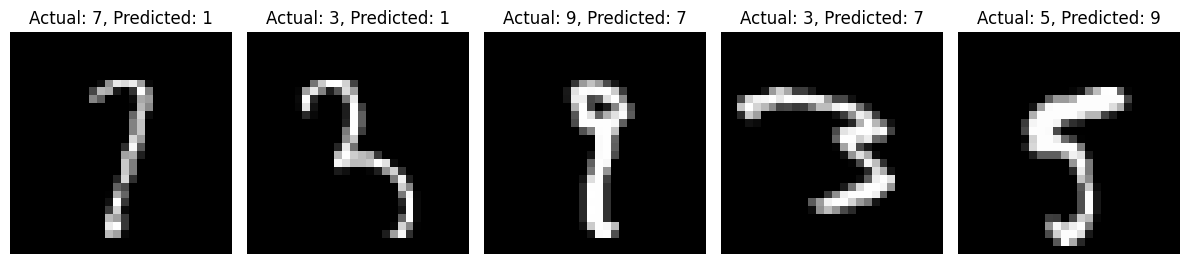

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

selected_classes = [1, 3, 5, 7, 9]
selected_indices_train = np.where(np.isin(y_train, selected_classes))[0]
selected_indices_test = np.where(np.isin(y_test, selected_classes))[0]

selected_images_train = x_train[selected_indices_train]
selected_labels_train = y_train[selected_indices_train]

selected_images_test = x_test[selected_indices_test]
selected_labels_test = y_test[selected_indices_test]

k_values = range(4, 41, 4)

lowest_accuracy_label_k4 = None
lowest_accuracy_label_k20 = None
lowest_accuracy_k4 = 1.0
lowest_accuracy_k20 = 1.0

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(selected_images_train.reshape(len(selected_images_train), -1), selected_labels_train)
    

    predictions = knn.predict(selected_images_test.reshape(len(selected_images_test), -1))
    accuracy = accuracy_score(selected_labels_test, predictions)
    
 
    if k == 4 and accuracy < lowest_accuracy_k4:
        lowest_accuracy_k4 = accuracy
        lowest_accuracy_label_k4 = selected_labels_test[np.where(predictions != selected_labels_test)]
    
    if k == 20 and accuracy < lowest_accuracy_k20:
        lowest_accuracy_k20 = accuracy
        lowest_accuracy_label_k20 = selected_labels_test[np.where(predictions != selected_labels_test)]

    print(f"K = {k}, Prediction accuracy: {accuracy}")


conf_matrix = confusion_matrix(selected_labels_test, predictions)
most_confused_labels = np.unravel_index(np.argmax(conf_matrix - np.eye(conf_matrix.shape[0]) * np.max(conf_matrix), axis=None), conf_matrix.shape)

print(f"Most confused labels：{selected_classes[most_confused_labels[0]]} being labled as {selected_classes[most_confused_labels[1]]}")


incorrect_indices = np.where(predictions != selected_labels_test)[0]
num_samples = min(5, len(incorrect_indices))

plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect_indices[:num_samples]):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(selected_images_test[idx], cmap='gray')
    plt.title(f"Actual: {selected_labels_test[idx]}, Predicted: {predictions[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
In the training and testing datasets, I selected images from categories 1, 3, 5, 7, and 9, and trained a k-NN classifier for different k values (from 4 to 40, with a step size of 4). After analyzing the results, for k = 4, the label predicted with the lowest accuracy is label 7, meaning that the digit 7 was most frequently misclassified as other labels.
For k = 20, the label predicted with the lowest accuracy is label 3. While the overall accuracy is relatively high, the prediction accuracy for class 3 is comparatively lower, indicating that this label was more challenging to classify at this k value.
By examining the confusion matrix, the most confused label pair is label 7 and label 1. Specifically, the model frequently misclassifies label 7 as label 1, and label 1 is sometimes predicted as label 7. The pixel patterns between these two digits may be similar, causing confusion for the model when distinguishing them.
During the training and testing process, I identified some mislabeled samples. To better understand these misclassifications, I visualized 5 incorrect predictions. Each sample shows a comparison between the actual and predicted labels. Visualizing these mislabeled samples helps us understand where the model tends to make mistakes.
Based on the pixel patterns for each category, I believe the model might struggle to distinguish between digit 3 and digit 5 or digit 7 and digit 1. These digits share similar shapes in certain cases, especially after binarization, where certain curves or lines might overlap or blur, making it challenging for the model to accurately classify them. For example, the right side of digit 3 and digit 5 both contain similar curved shapes, which could lead to misclassification. Additionally, digit 7 and digit 1 both have vertical strokes, and in some image processing cases, their forms might be too similar.

The confusion between these labels is primarily due to the similarity in their pixel values, particularly when their shapes and structures overlap. In these instances, the model may not be able to accurately distinguish between different digits.

### 3.4 Comprehension Questions

Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?

If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?
